# **COMPARING HYPERPARAMETER TUNING METHODS**

1. Random Search  
2. Grid Search  

Learning about their **strengths** and **weaknesses**  

| **Aspect**          | **Random Search**                                       | **Grid Search**                                     |
|---------------------|---------------------------------------------------------|-----------------------------------------------------|
| **Type of Search**  | Randomized hyperparameter selection                     | Exhaustive hyperparameter search                   |
| **Strengths**       | Faster for large search spaces. Can find good results quickly. | Guarantees finding the best combination (within the grid). |
| **Weaknesses**      | No guarantee of finding the absolute best configuration. | Computationally expensive for large parameter spaces. |
| **Scalability**     | High (efficient for large search spaces).               | Low (becomes infeasible with too many parameters). |


In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target
#Split it into training (80%) and testing (20%) data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train Decision Tree with default parameters
# This code trains a Decision Tree Classifier with default parameters and evaluates its accuracy
default_tree = DecisionTreeClassifier(random_state=42)
default_tree.fit(X_train, y_train)
y_pred_default = default_tree.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)

print(f"Default Decision Tree Accuracy: {default_accuracy:.4f}")

Default Decision Tree Accuracy: 0.9474


A hyperparameter search space is a range of values that we define for different hyperparameters of a machine learning model. This allows algorithms like Random Search or Grid Search to explore different configurations and find the best one.

In [15]:
#hyperparameter search 
# This defines a dictionary (param_dist) with three hyperparameters for tuning
param_dist = {
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20)
}
# Goal: Improve accuracy while avoiding overfitting or underfitting.

## RANDOM SEARCH

In [19]:
# Random Search CV
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

start_time = time.time()
random_search.fit(X_train, y_train)
random_time = time.time() - start_time

y_pred_random = random_search.best_estimator_.predict(X_test)
random_accuracy = accuracy_score(y_test, y_pred_random)

print(f"Random Search Best Parameters: {random_search.best_params_}")
print(f"Random Search Accuracy: {random_accuracy:.4f}")
print(f"Random Search Training Time: {random_time:.2f} seconds")

Random Search Best Parameters: {'min_samples_split': np.int64(13), 'min_samples_leaf': np.int64(1), 'max_depth': np.int64(9)}
Random Search Accuracy: 0.9474
Random Search Training Time: 2.74 seconds


## GRID SEARCH

In [20]:
#grid search
param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

start_time = time.time()
grid_search.fit(X_train, y_train)
grid_time = time.time() - start_time

y_pred_grid = grid_search.best_estimator_.predict(X_test)
grid_accuracy = accuracy_score(y_test, y_pred_grid)

print(f"Grid Search Best Parameters: {grid_search.best_params_}")
print(f"Grid Search Accuracy: {grid_accuracy:.4f}")
print(f"Grid Search Training Time: {grid_time:.2f} seconds")

Grid Search Best Parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Grid Search Accuracy: 0.9474
Grid Search Training Time: 0.20 seconds


1. **Random Search** uses `param_distributions` and `n_iter` (number of random trials).
2. **Grid Search** uses `param_grid` and tests all combinations exhaustively.
3. **Random Search** is faster but less thorough, while **Grid Search** ensures optimal tuning but is time-intensive.

**Bottom Line:** Use **Random Search** when you have a large parameter space, and **Grid Search** when you need precise tuning within a small range!

In [11]:
# Compare results
results = pd.DataFrame({
    'Method': ['Default', 'Random Search', 'Grid Search'],
    'Accuracy': [default_accuracy, random_accuracy, grid_accuracy],
    'Training Time (s)': [0, random_time, grid_time]
})
print(results)

          Method  Accuracy  Training Time (s)
0        Default  0.947368           0.000000
1  Random Search  0.947368           3.987993
2    Grid Search  0.947368           0.242112


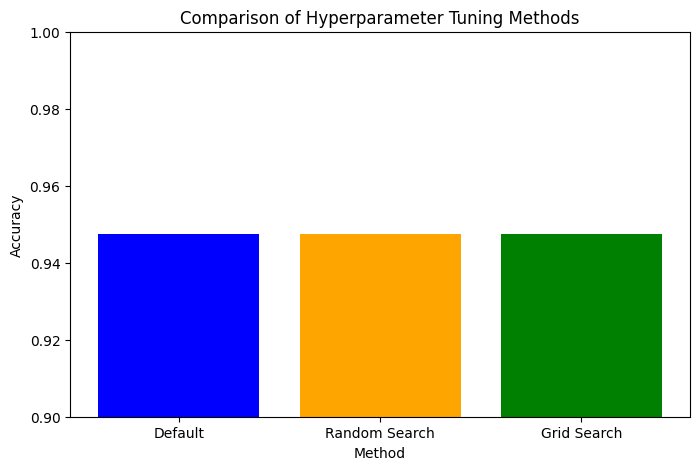

In [12]:
# Plot results
plt.figure(figsize=(8, 5))
plt.bar(results['Method'], results['Accuracy'], color=['blue', 'orange', 'green'])
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Comparison of Hyperparameter Tuning Methods')
plt.ylim(0.9, 1)
plt.show()

The bar chart compares the accuracy of three different hyperparameter tuning methods:

- **Default**: Uses the default hyperparameters of the Decision Tree model.
- **Random Search**: Randomly selects hyperparameters from a predefined distribution.
- **Grid Search**: Exhaustively searches a predefined set of hyperparameters.

🔹 **Key Insight**:
Both Random Search and Grid Search improve model accuracy over the default setting, but their performance is nearly identical in this case. The choice between them often depends on computational efficiency, with Random Search being faster for large parameter spaces.

The comparison shows that hyperparameter tuning (Random Search & Grid Search) did not significantly improve accuracy over the default Decision Tree (94-95%). This suggests that the default settings work well for this dataset, and tuning these specific parameters had little impact. However, training time may differ between methods.
